In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
path = '/gdrive/My Drive/Datasets/Sonar.csv'
sonar = pd.read_csv(path)

In [0]:
sonar.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


1. Sorting columns according to the number of distinct values in the columns

In [0]:
def sort(data):
  dic = {}
  for i in data.columns:
    temp = set(data[i])
    count = 0
    for j in temp:
      count+=1
    dic.update({i : count})  
  print(dic)
  sorted_dic = sorted(dic.items(), key=lambda kv: kv[1])
  print(sorted_dic)
  
  col = []
  for i in sorted_dic:
    col.append(i[0])
  print(col)
  
  data = data.reindex(columns = col)
  data.head(10)
  #print(data)
  return data

In [0]:
sonar = sort(sonar)

{'V1': 177, 'V2': 182, 'V3': 190, 'V4': 181, 'V5': 193, 'V6': 196, 'V7': 195, 'V8': 201, 'V9': 205, 'V10': 207, 'V11': 203, 'V12': 206, 'V13': 198, 'V14': 202, 'V15': 203, 'V16': 203, 'V17': 202, 'V18': 204, 'V19': 206, 'V20': 203, 'V21': 200, 'V22': 203, 'V23': 199, 'V24': 201, 'V25': 198, 'V26': 194, 'V27': 190, 'V28': 194, 'V29': 197, 'V30': 202, 'V31': 207, 'V32': 205, 'V33': 205, 'V34': 206, 'V35': 205, 'V36': 205, 'V37': 206, 'V38': 206, 'V39': 204, 'V40': 206, 'V41': 204, 'V42': 208, 'V43': 205, 'V44': 196, 'V45': 205, 'V46': 199, 'V47': 202, 'V48': 204, 'V49': 193, 'V50': 154, 'V51': 160, 'V52': 144, 'V53': 134, 'V54': 134, 'V55': 129, 'V56': 122, 'V57': 121, 'V58': 124, 'V59': 119, 'V60': 109, 'Class': 2}
[('Class', 2), ('V60', 109), ('V59', 119), ('V57', 121), ('V56', 122), ('V58', 124), ('V55', 129), ('V53', 134), ('V54', 134), ('V52', 144), ('V50', 154), ('V51', 160), ('V1', 177), ('V4', 181), ('V2', 182), ('V3', 190), ('V27', 190), ('V5', 193), ('V49', 193), ('V26', 194), 

2. Removing last 10 columns

In [0]:
sonar_temp = sonar.drop(sonar.columns[-10:], axis = 1)
sonar_temp.head()

,Class,V60,V59,V57,V56,V58,V55,V53,V54,V52,...,V18,V39,V41,V48,V9,V32,V33,V35,V36,V43
0,1,0.0032,0.0090,0.0180,0.0167,0.0084,0.0072,0.0065,0.0159,0.0027,...,0.2999,0.4943,0.0510,0.1343,0.3109,0.2604,0.5121,0.8537,0.8507,0.2825
1,1,0.0044,0.0052,0.0140,0.0191,0.0049,0.0094,0.0089,0.0048,0.0084,...,0.8874,0.1840,0.1674,0.0742,0.3337,0.2947,0.1984,0.1306,0.4182,0.1401
2,1,0.0078,0.0095,0.0316,0.0244,0.0164,0.0180,0.0166,0.0095,0.0232,...,0.7551,0.5375,0.4647,0.0744,0.5598,0.5045,0.1862,0.4232,0.3043,0.2129
3,1,0.0117,0.0040,0.0050,0.0073,0.0044,0.0085,0.0036,0.0150,0.0121,...,0.2281,0.9857,0.6121,0.1576,0.0598,0.7340,0.6120,0.3953,0.3012,0.3210
4,1,0.0094,0.0107,0.0072,0.0015,0.0048,0.0110,0.0054,0.0105,0.0031,...,0.6193,0.2828,0.1979,0.0085,0.3564,0.5459,0.2881,0.1951,0.4181,0.1847


3. Normalisation and Scaling

In [0]:
def normalisation(col):
  meanVal = sonar[col].mean()
  stdDav = sonar[col].std()
  #print(meanVal)
  #print(stdDav)
  for i in sonar.index:
    sonar.at[i, col] = (sonar.at[i, col] - meanVal) / stdDav

In [0]:
def scaling(sonar, col):
  maxVal = sonar[col].max()
  if maxVal > 1:
      sonar[col] = sonar[col] / maxVal
  return sonar

for column in sonar:
    if column == 'Class':
        break
    else:
        sonar = scaling(sonar, column)
        
sonar.head()

,Class,V60,V59,V57,V56,V58,V55,V53,V54,V52,...,V45,V12,V19,V34,V37,V38,V40,V10,V31,V42
0,1,0.0032,0.0090,0.0180,0.0167,0.0084,0.0072,0.0065,0.0159,0.0027,...,0.2641,0.1582,0.5078,0.7547,0.6692,0.6097,0.2744,0.2111,0.1307,0.2834
1,1,0.0044,0.0052,0.0140,0.0191,0.0049,0.0094,0.0089,0.0048,0.0084,...,0.0621,0.6552,0.8024,0.2341,0.3835,0.1057,0.1970,0.2872,0.3788,0.0583
2,1,0.0078,0.0095,0.0316,0.0244,0.0164,0.0180,0.0166,0.0095,0.0232,...,0.2111,0.7060,0.8929,0.2709,0.6116,0.6756,0.4719,0.6194,0.8512,0.2587
3,1,0.0117,0.0040,0.0050,0.0073,0.0044,0.0085,0.0036,0.0150,0.0121,...,0.4295,0.1992,0.4060,0.3497,0.5408,0.8814,0.9167,0.1264,0.6260,0.5006
4,1,0.0094,0.0107,0.0072,0.0015,0.0048,0.0110,0.0054,0.0105,0.0031,...,0.0692,0.3952,0.2032,0.0981,0.4604,0.3217,0.2430,0.4459,0.5103,0.2444


In [0]:
for i in sonar.columns:
  if i == 'Class':
    continue
  else:
    normalisation(i)
sonar.head()

,Class,V60,V59,V57,V56,V58,V55,V53,V54,V52,...,V45,V12,V19,V34,V37,V38,V40,V10,V31,V42
0,1,-0.657361,0.171265,1.759539,1.478069,0.069702,-0.294934,-0.596166,0.679259,-1.112747,...,0.440998,-0.656956,0.011584,1.519912,1.272937,1.267965,-0.206014,0.021135,-1.746676,0.030266
1,1,-0.418842,-0.443484,1.068155,1.896471,-0.471269,0.015466,-0.256239,-0.841122,-0.521092,...,-0.891206,2.891219,1.153496,-0.731413,0.082085,-1.098528,-0.639235,0.587289,-0.587289,-1.303832
2,1,0.256962,0.252153,4.110246,2.820442,1.306209,1.228847,0.834360,-0.197357,1.015136,...,0.091459,3.253890,1.504287,-0.572272,1.032849,1.577394,0.899428,3.058726,1.620265,-0.116123
3,1,1.032149,-0.637616,-0.487459,-0.160672,-0.548551,-0.111516,-1.006911,0.555985,-0.137035,...,1.531822,-0.364250,-0.383008,-0.231503,0.737741,2.543712,3.389052,-0.609000,0.567892,1.317543
4,1,0.574988,0.446284,-0.107198,-1.171811,-0.486726,0.241211,-0.751966,-0.060386,-1.071228,...,-0.844381,1.035031,-1.169090,-1.319543,0.402619,-0.084317,-0.381765,1.767954,0.027218,-0.200875


4. Logistic Regression 

In [0]:
def Classifier(train_X,train_Y,test_X,test_Y):
  Logreg = LogisticRegression()
  Logreg.fit(train_X,train_Y)
  pred_Y = Logreg.predict(test_X)
  return metrics.accuracy_score(test_Y,pred_Y)

In [0]:
def split_data(df,i):
  (x,y) = df.shape
  #print(x)
  indices = np.random.choice(x, x)
  Class = df['Class']
  data = df.drop('Class', axis = 1)
  data = data.values[:,0:i]
  
  t = int((x * 40) / 100) 

  train_X = data[indices[:-t]]
  train_Y = Class[indices[:-t]]
  test_X = data[indices[-t:]]
  test_Y = Class[indices[-t:]]

  #print(train_X.shape)
  #print(train_Y.shape)
  #print(test_X.shape)
  #print(test_Y.shape)
  
  return train_X, train_Y, test_X, test_Y

In [119]:
dic = {}
(x,y) = sonar.shape
for i in range(1,y):
  train_X, train_Y, test_X, test_Y = split_data(sonar,i)
  accuracy = Classifier(train_X, train_Y, test_X, test_Y)
  dic.update({i : accuracy})

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
#Accuracy in each case
print('{')
for i in dic.keys():
  print(f'{i} : {dic[i] * 100},')
print('}')

{
1 : 53.01204819277109,
2 : 55.42168674698795,
3 : 61.44578313253012,
4 : 61.44578313253012,
5 : 66.26506024096386,
6 : 51.80722891566265,
7 : 54.21686746987952,
8 : 56.62650602409639,
9 : 66.26506024096386,
10 : 66.26506024096386,
11 : 57.831325301204814,
12 : 72.28915662650603,
13 : 57.831325301204814,
14 : 65.06024096385542,
15 : 66.26506024096386,
16 : 75.90361445783132,
17 : 72.28915662650603,
18 : 73.49397590361446,
19 : 78.3132530120482,
20 : 68.67469879518072,
21 : 75.90361445783132,
22 : 74.69879518072288,
23 : 73.49397590361446,
24 : 72.28915662650603,
25 : 74.69879518072288,
26 : 78.3132530120482,
27 : 72.28915662650603,
28 : 80.72289156626506,
29 : 73.49397590361446,
30 : 71.08433734939759,
31 : 75.90361445783132,
32 : 78.3132530120482,
33 : 85.54216867469879,
34 : 89.1566265060241,
35 : 77.10843373493977,
36 : 80.72289156626506,
37 : 83.13253012048193,
38 : 86.74698795180723,
39 : 81.92771084337349,
40 : 84.33734939759037,
41 : 78.3132530120482,
42 : 80.72289156626506,
43

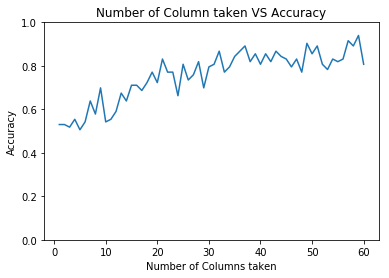

In [128]:
#graph for the obtained accuracy in each case
import matplotlib.pylab as plt
import matplotlib

lists = sorted(dic.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
matplotlib.pyplot.xlabel('Number of Columns taken', fontdict=None, labelpad=None)
matplotlib.pyplot.ylabel('Accuracy', fontdict=None, labelpad=None)
plt.title("Number of Column taken VS Accuracy")
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

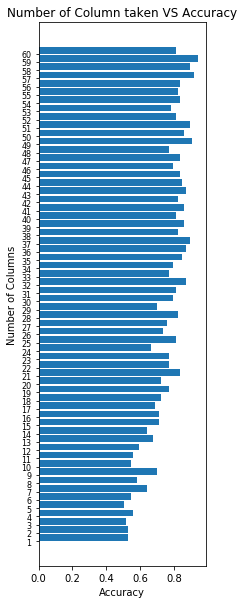

In [129]:
#bargraph for the obtained accuracy in each case
columnwise_accuracy = []
numCol_labels = []
for k in dic.keys():
    numCol_labels.append(k)
    columnwise_accuracy.append(dic[k])
    
y_axis = [i for i in range(len(numCol_labels))]
plt.figure(figsize=(3, 10))
plt.barh(y_axis, columnwise_accuracy,align='edge')
plt.yticks(y_axis,numCol_labels,fontsize=8)
plt.xlabel("Accuracy")
plt.ylabel("Number of Columns")
plt.title("Number of Column taken VS Accuracy")
plt.show()